[colab notebook file](https://colab.research.google.com/drive/1x_S4pY0Kl0y6kAn52JG-j4rk1eO6Z7gp?usp=sharing)

[pong-cnn-out.txt (training logs)](https://drive.google.com/file/d/1u0DDm8ex_z2Ybq1bEslDLUvfoxr_Xa7p/view?usp=sharing)

[model weights for test-1](https://drive.google.com/file/d/1-v0fJDmK5hbkNUpFtrr9YoR63hKnjwVC/view?usp=sharing)

[model weights for test-2](https://drive.google.com/file/d/1--C9Rsg-S4o3QU7Ee8z04U72jBkb3NcH/view?usp=sharing)

[model weights for test-3](https://drive.google.com/file/d/1-7fCGEcsmd2J7YaEN69iDtJt-ZTAhQII/view?usp=sharing)

[model weights for test-4](https://drive.google.com/file/d/1-4hpdg0ZiKayOH4pgh6RU2Q_uRr2x7yo/view?usp=sharing)

[model weights for test-5](https://drive.google.com/file/d/1-PWLztWRbbwzXKeGnkaHmldT09NVjzRj/view?usp=sharing)

[test-1 result](https://drive.google.com/file/d/1-XlnunNXhD-JAFVdJ3vLTG3wmai8Gv5i/view?usp=sharing)

[test-2 result](https://drive.google.com/file/d/1-iwy4q1BKethqI73jTcBTaWVbf-mvIGB/view?usp=sharing)

[test-3 result](https://drive.google.com/file/d/100lbYCuVLzuNVkHsy5k8heCEqJNVsZw5/view?usp=sharing)

[test-4 result](https://drive.google.com/file/d/10HUDVDoano2RCwiEXDZqoyPzcq0XEzxZ/view?usp=sharing)

[test-5 result](https://drive.google.com/file/d/10UHMB3hRsgrV8h3ucu8PWyQwURDZASuP/view?usp=sharing)

# Mastering Atari Games using Deep Reinforcement Learning

you will learn how to implement a Double-Deep-Q-Network (DDQN), and to demonstrate that, you may implement and train a DDQN and run it on an Atari game in **OpenAI-Gym** environment. Additionally, you may also want to refer to the [original paper](https://arxiv.org/pdf/1312.5602.pdf) regarding the usage of DQN in Atari networks. Double-DQN works the same with slight difference in using two identical networks for Q-table. [read this](https://medium.com/@parsa_h_m/deep-reinforcement-learning-dqn-double-dqn-dueling-dqn-noisy-dqn-and-dqn-with-prioritized-551f621a9823)

* **PongDeterministic-v4**: A famous Atari game that is a staple for learning deep q networks. This game is already available in the gym library environment. By solving this completely you will receive 100/100 points.

In the following, you can read the description of the games and how to start running it. We advise using either `Google-Colab` or `Kaggle` for training the model as DQN models usually take a lot of time to train.


# Environment setup and importing libraries

In [ ]:
!nvidia-smi

Fri Jul 22 14:27:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install atari-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gym
import cv2

import time
import json
import random
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from collections import deque

import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

First mount to your colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/DDQN/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1-9lvyxLzin_ONpOHols6ARmHyvlSFyUB/DDQN


now download ROM.rar from [here](http://www.atarimania.com/rom_collection_archive_atari_2600_roms.html) and then, upload them to the same folder as this google colab is located. Then unrar it using code below:

In [ ]:
!wget http://www.atarimania.com/roms/Roms.rar 

--2022-07-10 18:39:43--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19583716 (19M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  18.68M   638KB/s    in 31s     

2022-07-10 18:40:14 (620 KB/s) - ‘Roms.rar’ saved [19583716/19583716]



In [ ]:
!unrar x "Roms.rar"

Streaming output truncated to the last 5000 lines.
Extracting  ROMS/Air-Sea Battle (32 in 1) (1988) (Atari, Larry Kaplan) (CX26163P) (PAL).bin       1%  OK 
Extracting  ROMS/Air-Sea Battle (Hack) (Unknown) (4K).bin                  1%  OK 
Extracting  ROMS/Air-Sea Battle - Air Sea Battle (Anti-Aircraft) (1977) (Atari, Larry Kaplan) (CX2602, CX2602P) (PAL).bin       1%  OK 
Extracting  ROMS/Air-Sea Battle - Air Sea Battle - Target Fun (Anti-Aircraft) (1977) (Atari, Larry Kaplan - Sears) (CX2602 - 99802, 6-99802, 49-75102) ~.bin       1%  OK 
Extracting  ROMS/Airlock (1982) (Data Age) (DA1004) (Prototype).bin        1%  OK 
Extracting  ROMS/Airlock (1982) (Data Age) (DA1004) ~.bin                  1%  OK 
Extracting  ROMS/Airlock (1983) (Gameworld) (133-004) (PAL).bin            1%  OK 
Extracting  ROMS/Alices Abenteuer - Lilly Adventure (1983) (Quelle - Otto Versand) (732.273 8 - 600273, 781644) (PAL).bin       1%  

now add them to your python!

In [ ]:
!python -m atari_py.import_roms /content/drive/MyDrive/DDQN/ROMS/

copying elevator_action.bin from /content/drive/MyDrive/DDQN/ROMS/Elevator Action (1983) (Atari, Dan Hitchens) (CX26126) (Prototype) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/elevator_action.bin
copying asterix.bin from /content/drive/MyDrive/DDQN/ROMS/Asterix (AKA Taz) (1984) (Atari, Jerome Domurat, Steve Woita) (CX2696).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/asterix.bin
copying riverraid.bin from /content/drive/MyDrive/DDQN/ROMS/River Raid (1982) (Activision, Carol Shaw) (AX-020, AX-020-04) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/riverraid.bin
copying video_pinball.bin from /content/drive/MyDrive/DDQN/ROMS/Pinball (AKA Video Pinball) (Zellers).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/video_pinball.bin
copying road_runner.bin from patched version of /content/drive/MyDrive/DDQN/ROMS/Road Runner (1989) (Atari - Bobco, Robert C. Polaro) (CX2663) ~.bin to /usr/local/lib/python3.7/dist

Experiments with the environment

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
ENVIRONMENT = "PongDeterministic-v4"

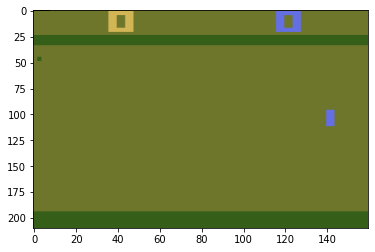

In [ ]:
env = gym.make(ENVIRONMENT)
obs = env.reset()
plt.imshow(env.render(mode='rgb_array'), aspect='auto')
plt.show()

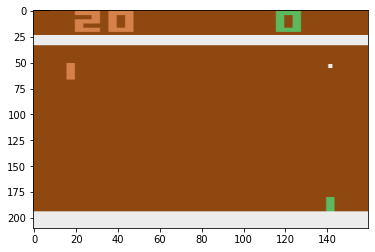

In [ ]:
env = gym.make(ENVIRONMENT)
env.seed(2022)
obs = env.reset()

a = env.action_space.sample()
for i in range(5000):
    a = env.action_space.sample()
    observation, reward, done, info = env.step(a)
    if (i + 1) % 5 == 0:
        clear_output(True)
        screen = env.render(mode='rgb_array')
        plt.imshow(screen, aspect='auto')
        plt.show()
    if done:
        break

In [ ]:
environment = gym.make(ENVIRONMENT)
print("environment observation", environment.observation_space)
print("environment action space", environment.action_space)
environment.reset()
print("next state, reward, done", environment.step( environment.action_space.sample()))

environment observation Box(0, 255, (210, 160, 3), uint8)
environment action space Discrete(6)
next state, reward, done (array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [144,  72,  17],
        [144,  72,  17],
        [144,  72,  17]],

       [[144,  72,  17],
        [144,  72,  17],
        [144,  72,  17],
        ...,
        [144,  72,  17],
        [144,  72,  17],
        [144,  72,  17]],

       [[144,  72,  17],
        [144,  72,  17],
        [144,  72,  17],
        ...,
        [144,  72,  17],
        [144,  72,  17],
        [144,  72,  17]],

       ...,

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236]],

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [236, 236, 236]],

       [[236, 236, 236],
        [236, 23

feel free to do more experiments with the environment.

# Hyperparameters

There are some parameters for your implementation. Feel free to change them.

In [ ]:

SAVE_MODELS = True  # Save models to file so you can test later
MODEL_PATH = "./pong-cnn-"  # Models path for saving or loading
SAVE_MODEL_INTERVAL = 10  # Save models at every X epoch
TRAIN_MODEL = True  # Train model while playing (Make it False when testing a model)

LOAD_MODEL_FROM_FILE = True  # Load model from file
LOAD_FILE_EPISODE = 310 # Load Xth episode from file

BATCH_SIZE = 64  # Minibatch size that select randomly from mem for train nets
MAX_EPISODE = 100000  # Max episode
MAX_STEP = 100000  # Max step size for one episode

MAX_MEMORY_LEN = 1000  # Max memory len
MIN_MEMORY_LEN = 500  # Min memory len before start train

GAMMA = 0.97  # Discount rate
ALPHA = 0.00025  # Learning rate
EPSILON_DECAY = 1/200  # Epsilon decay rate by step

RENDER_GAME_WINDOW = False  # Opens a new window to render the game (Won't work on colab default)

# Image proccessing 

## [DuelCNN](https://arxiv.org/abs/1511.06581) 

which is a specialized network for RL tasks.

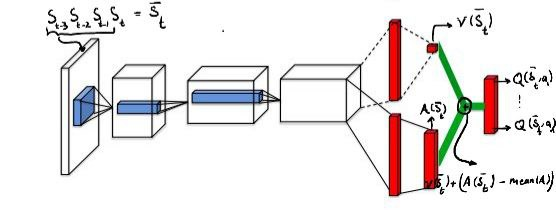

The recommanded arcitecture for Q network is shown above.
Input of network is a preprocessed 4-stacked continous frames of the game. (this trick is done in order for agent to understant the time!)

The network would then be splitted into two parralel linear layers for value and actions. 

These two layers would then be combined into a action_space sized vector as the output of the network. 

In [ ]:
class DuelCNN(nn.Module):
  
    def __init__(self, h, w, output_size):
        # todo
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(4, 32, 8, 4, 0, 1, 1),
            nn.ReLU(32),
            nn.Conv2d(32, 64, 4, 2, 0, 1, 1),
            nn.ReLU(64),
            nn.Conv2d(64, 64, 3, 1, 0, 1, 1),
            nn.ReLU(64),
            nn.Flatten(),
            nn.Linear(20480, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU()
        )

        self.l1 = nn.Linear(512, 1)
        self.l2 = nn.Linear(512, output_size)

    def forward(self, x):
        # todo
        x = self.conv(x)
        value = self.l1(x)
        advantage = self.l2(x)
        Q = torch.add(value, advantage - advantage.mean(dim = 1, keepdim = True))
        return Q

# DoubleDQN Agent (DDQN)

**Algorithm A. DDQN**


Q1 = online Q network
Q2 = target Q network

For each step:
1. Choose action a ϵ-greedy(Q1)
2. s = env.step(a)
3. store into replay buffer
4. train Q1 and Q2 networks with algorithm B(Q1, Q2, replay_buffer)
5. Q2 ← Q1

**Algorithm B. train**
1. take samples (s, a, r, ns, done) from replay_buffer
2. train Q1 with loss function: 

$$ ℒ(Q1(s, a), r + γ * Q2(ns, argmax Q1(ns, a')))$$

where

$$ ℒ(x, y) = (x-y)^{2}$$


In [ ]:
class Agent:
    def __init__(self, environment):
        """
        Hyperparameters definition for Agent
        """

        # set other necessary parameters for the two DuelCNNs

        # Image pre process params set height and width and crop(20pixels from top)
        #todo

        self.env = environment

        self.h = 190
        self.w = 160
        self.crop = 20

        # Trust rate to our experiences
        self.gamma = GAMMA  # Discount coef for future predictions
        self.alpha = ALPHA  # Learning Rate

        # After many experinces epsilon will be 0.05
        # So we will do less Explore more Exploit
        # set self.epsilon (initial epsilon), self.epsilon_decay and self.epsilon_minimum
        #todo

        self.epsilon = 0.6
        self.epsilon_decay = EPSILON_DECAY 
        self.epsilon_minimum = 0.05

        # Deque holds replay mem (replay_buffer).
        #todo

        self.memory = deque([], maxlen = MAX_MEMORY_LEN)

        # Create two model for DDQN algorithm (online_model and target_model CNNs)
        #todo

        self.online_model = DuelCNN(self.h, self.w, 6).to(DEVICE)
        self.target_model = DuelCNN(self.h, self.w, 6).to(DEVICE)
        self.target_model.load_state_dict(self.online_model.state_dict())
        self.target_model.eval()

        # set the optimizer
        #todo

        self.optimizer = optim.Adam(self.online_model.parameters(), lr = 1e-4)

    def preProcess(self, image):
        """
        Process image (for example to grayscale)
        crop (the score table above each picture),
        resize (to (target_w, target_h)),
        and
        normalize the images
        """
        #todo

        processed_img = image[20:, :, :]
        R, G, B = processed_img[:, :, 0], processed_img[:, :, 1], processed_img[:, :, 2]
        processed_img = 0.2989 * R + 0.5870 * G + 0.1140 * B

        processed_img = (processed_img - processed_img.mean(axis = (0, 1), keepdims = True)) / (processed_img.std(axis = (0, 1), keepdims = True))

        return processed_img

    def act(self, state):
        """
        Get state and do action
        Two option can be selectedd if explore select random action
        if exploit ask nnet for action
        use epsilon greedy algorithm
        """

        #todo

        if np.random.rand() < self.epsilon:
          action = self.env.action_space.sample()
        else:
          x = torch.tensor(state.astype(np.float64)).unsqueeze(0).to(DEVICE)
          action = self.online_model(x.float()).argmax()
          action = action.detach().cpu().numpy()
          
        return action

    def train(self):
        """
        Train neural nets with replay memory
        returns loss and max_q val predicted from online_net
        """
        if len(agent.memory) < MIN_MEMORY_LEN:
            loss, max_q = [0, 0]
            return loss, max_q

        "use specified algorithm to complete the code"
        #todo
        loss = 0
        max_q = 0
        sample = np.array(random.sample(self.memory, BATCH_SIZE), dtype = object)

        
        state, action, reward, nextState, done = sample[:, 0], sample[:, 1], sample[:, 2], sample[:, 3], sample[:, 4]
        l1 = []
        l2 = []
        for x in state:
          l1.append(x)
        for x in nextState:
          l2.append(x)

        state = torch.FloatTensor(np.array(l1)).to(DEVICE)
        action = torch.LongTensor(action.astype(np.int32)).unsqueeze(1).to(DEVICE)
        reward = torch.tensor(reward.astype(np.float64)).to(DEVICE)
        nextState = torch.FloatTensor(np.array(l2)).to(DEVICE)
        dones = torch.FloatTensor(done.astype(np.float64)).to(DEVICE)

        q_values = self.online_model(state).gather(1, action)# .detach()
        max_actions = self.online_model(nextState).argmax(dim = 1, keepdim = True).detach()
        q2_values = (reward + self.gamma * (self.target_model(nextState).gather(1, max_actions).squeeze(1))).to(DEVICE)

        
        loss = F.smooth_l1_loss(q_values.squeeze(1).float(), q2_values.float())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        loss = loss.item()
        max_q = q_values.max().item()

        return loss, max_q

    def storeResults(self, state, action, reward, nextState, done):
        """
        Store every result to memory
        Create a replay buffer of [state, action, reward, nextState, done] for nn
        """
        #todo
        self.memory.append([state, action, reward, nextState, done])

    def adaptiveEpsilon(self):
        """
        Adaptive Epsilon means every step
        we decrease the epsilon so we do less Explore
        """
        #todo
        self.epsilon = max(
                    self.epsilon_minimum, self.epsilon - (
                        0.6 - self.epsilon_minimum
                    ) * self.epsilon_decay
                )

# Learning loop

Running this loop, would take 7 to 12 hours!

So make sure to save and load your trained models frequently.

In [ ]:
environment = gym.make(ENVIRONMENT)  # Get env
agent = Agent(environment)  # Create Agent

if LOAD_MODEL_FROM_FILE:
    agent.online_model.load_state_dict(torch.load(MODEL_PATH+str(LOAD_FILE_EPISODE)+".pkl"))
    with open(MODEL_PATH+str(LOAD_FILE_EPISODE)+'.json') as outfile:
        param = json.load(outfile)
        agent.epsilon = param.get('epsilon')

    startEpisode = LOAD_FILE_EPISODE + 1

else:
    startEpisode = 1

last_100_ep_reward = deque(maxlen=100)  # Last 100 episode rewards
total_step = 1  # Cumulkative sum of all steps in episodes
for episode in range(startEpisode, MAX_EPISODE):

    startTime = time.time()  # Keep time
    state = environment.reset()  # Reset env

    state = agent.preProcess(state)  # Process image

    # Stack state . Every state contains 4 time contionusly frames
    # We stack frames like 4 channel image
    state = np.stack((state, state, state, state))

    total_max_q_val = 0  # Total max q vals
    total_reward = 0  # Total reward for each episode
    total_loss = 0  # Total loss for each episode
    for step in range(MAX_STEP):

        if RENDER_GAME_WINDOW:
            plt.imshow(env.render(mode='rgb_array'), aspect='auto')
            plt.show()  # Show state visually

        # Select and perform an action
        action = agent.act(state)  # Act
        next_state, reward, done, info = environment.step(action)  # Observe

        next_state = agent.preProcess(next_state)  # Process image

        # Stack state . Every state contains 4 time contionusly frames
        # We stack frames like 4 channel image
        next_state = np.stack((next_state, state[0], state[1], state[2]))

        # Store the transition in memory
        agent.storeResults(state, action, reward, next_state, done)  # Store to mem

        # Move to the next state
        state = next_state  # Update state

        if TRAIN_MODEL:
            # Perform one step of the optimization (on the target network)
            loss, max_q_val = agent.train()  # Train with random BATCH_SIZE state taken from mem
        else:
            loss, max_q_val = [0, 0]

        total_loss += loss
        total_max_q_val += max_q_val
        total_reward += reward
        total_step += 1
        if total_step % 1000 == 0:
            agent.adaptiveEpsilon()  # Decrase epsilon

        if done:  # Episode completed
            currentTime = time.time()  # Keep current time
            time_passed = currentTime - startTime  # Find episode duration
            current_time_format = time.strftime("%H:%M:%S", time.gmtime())  # Get current dateTime as HH:MM:SS
            epsilonDict = {'epsilon': agent.epsilon}  # Create epsilon dict to save model as file

            if SAVE_MODELS and episode % SAVE_MODEL_INTERVAL == 0:  # Save model as file
                weightsPath = MODEL_PATH + str(episode) + '.pkl'
                epsilonPath = MODEL_PATH + str(episode) + '.json'

                torch.save(agent.online_model.state_dict(), weightsPath)
                with open(epsilonPath, 'w') as outfile:
                    json.dump(epsilonDict, outfile)

            if TRAIN_MODEL:
                agent.target_model.load_state_dict(agent.online_model.state_dict())  # Update target model

            last_100_ep_reward.append(total_reward)
            avg_max_q_val = total_max_q_val / step

            outStr = "Episode:{} Time:{} Reward:{:.2f} Loss:{:.2f} Last_100_Avg_Rew:{:.3f} Avg_Max_Q:{:.3f} Epsilon:{:.2f} Duration:{:.2f} Step:{} CStep:{}".format(
                episode, current_time_format, total_reward, total_loss, np.mean(last_100_ep_reward), avg_max_q_val, agent.epsilon, time_passed, step, total_step
            )

            print(outStr)

            if SAVE_MODELS:
                outputPath = MODEL_PATH + "out" + '.txt'  # Save outStr to file
                with open(outputPath, 'a') as outfile:
                    outfile.write(outStr+"\n")

            break

Episode:311 Time:07:20:46 Reward:-19.00 Loss:2.33 Last_100_Avg_Rew:-19.000 Avg_Max_Q:0.097 Epsilon:0.05 Duration:98.57 Step:1327 CStep:1329
Episode:312 Time:07:22:43 Reward:-19.00 Loss:0.33 Last_100_Avg_Rew:-19.000 Avg_Max_Q:0.307 Epsilon:0.05 Duration:117.58 Step:1082 CStep:2412
Episode:313 Time:07:24:10 Reward:-21.00 Loss:0.18 Last_100_Avg_Rew:-19.667 Avg_Max_Q:0.169 Epsilon:0.05 Duration:86.37 Step:791 CStep:3204
Episode:314 Time:07:25:51 Reward:-19.00 Loss:0.18 Last_100_Avg_Rew:-19.500 Avg_Max_Q:0.289 Epsilon:0.05 Duration:101.58 Step:931 CStep:4136
Episode:315 Time:07:27:17 Reward:-21.00 Loss:0.12 Last_100_Avg_Rew:-19.800 Avg_Max_Q:0.187 Epsilon:0.05 Duration:86.15 Step:791 CStep:4928
Episode:316 Time:07:28:47 Reward:-21.00 Loss:0.10 Last_100_Avg_Rew:-20.000 Avg_Max_Q:0.071 Epsilon:0.05 Duration:89.64 Step:823 CStep:5752
Episode:317 Time:07:30:20 Reward:-20.00 Loss:0.11 Last_100_Avg_Rew:-20.000 Avg_Max_Q:0.115 Epsilon:0.05 Duration:92.77 Step:859 CStep:6612
Episode:318 Time:07:31:

#play


play with your trained agent! (show the game in a gif!)

---
Play with the agent in 5 different stages of training.

In [ ]:
environment = gym.make(ENVIRONMENT)
environment = gym.wrappers.Monitor(environment, 'test_1', force = True)

agent2 = Agent(environment)
agent2.online_model.load_state_dict(torch.load('pong-cnn-100.pkl', map_location=torch.device('cpu')))
state = environment.reset()
done = False
total_reward = 0
while not done:
  state = agent2.preProcess(state)
  state = np.stack((state, state, state, state))
  action = agent2.act(state)
  next_state, reward, done, _ = environment.step(action)
  state = next_state
  total_reward += reward

environment.close()

environment = gym.make(ENVIRONMENT)
environment = gym.wrappers.Monitor(environment, 'test_2', force = True)

agent2 = Agent(environment)
agent2.online_model.load_state_dict(torch.load('pong-cnn-160.pkl', map_location=torch.device('cpu')))
state = environment.reset()
done = False
total_reward = 0
while not done:
  state = agent2.preProcess(state)
  state = np.stack((state, state, state, state))
  action = agent2.act(state)
  next_state, reward, done, _ = environment.step(action)
  state = next_state
  total_reward += reward

environment.close()

environment = gym.make(ENVIRONMENT)
environment = gym.wrappers.Monitor(environment, 'test_3', force = True)

agent2 = Agent(environment)
agent2.online_model.load_state_dict(torch.load('pong-cnn-220.pkl', map_location=torch.device('cpu')))
state = environment.reset()
done = False
total_reward = 0
while not done:
  state = agent2.preProcess(state)
  state = np.stack((state, state, state, state))
  action = agent2.act(state)
  next_state, reward, done, _ = environment.step(action)
  state = next_state
  total_reward += reward

environment.close()

environment = gym.make(ENVIRONMENT)
environment = gym.wrappers.Monitor(environment, 'test_4', force = True)

agent2 = Agent(environment)
agent2.online_model.load_state_dict(torch.load('pong-cnn-280.pkl', map_location=torch.device('cpu')))
state = environment.reset()
done = False
total_reward = 0
while not done:
  state = agent2.preProcess(state)
  state = np.stack((state, state, state, state))
  action = agent2.act(state)
  next_state, reward, done, _ = environment.step(action)
  state = next_state
  total_reward += reward

environment.close()

environment = gym.make(ENVIRONMENT)
environment = gym.wrappers.Monitor(environment, 'test_5', force = True)

agent2 = Agent(environment)
agent2.online_model.load_state_dict(torch.load('pong-cnn-390.pkl', map_location=torch.device('cpu')))
state = environment.reset()
done = False
total_reward = 0
while not done:
  state = agent2.preProcess(state)
  state = np.stack((state, state, state, state))
  action = agent2.act(state)
  next_state, reward, done, _ = environment.step(action)
  state = next_state
  total_reward += reward

environment.close()

In [ ]:
import base64
import glob
import io
import os

from IPython.display import HTML, display


def ipython_show_video(path: str) -> None:

    video = io.open(path, "r+b").read()
    encoded = base64.b64encode(video)

    display(HTML(
        data="""
        <video width="320" height="240" alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4"/>
        </video>
        """.format(encoded.decode("ascii"))
    ))

print('test-1')
ipython_show_video('/content/drive/MyDrive/DDQN/test_1/openaigym.video.1.65.video000000.mp4')

print('test-2')
ipython_show_video('/content/drive/MyDrive/DDQN/test_2/openaigym.video.2.65.video000000.mp4')

print('test-3')
ipython_show_video('/content/drive/MyDrive/DDQN/test_3/openaigym.video.3.65.video000000.mp4')

print('test-4')
ipython_show_video('/content/drive/MyDrive/DDQN/test_4/openaigym.video.4.65.video000000.mp4')

print('test-5')
ipython_show_video('/content/drive/MyDrive/DDQN/test_5/openaigym.video.5.65.video000000.mp4')


test-1


test-2


test-3


test-4


test-5


# Analysis of results

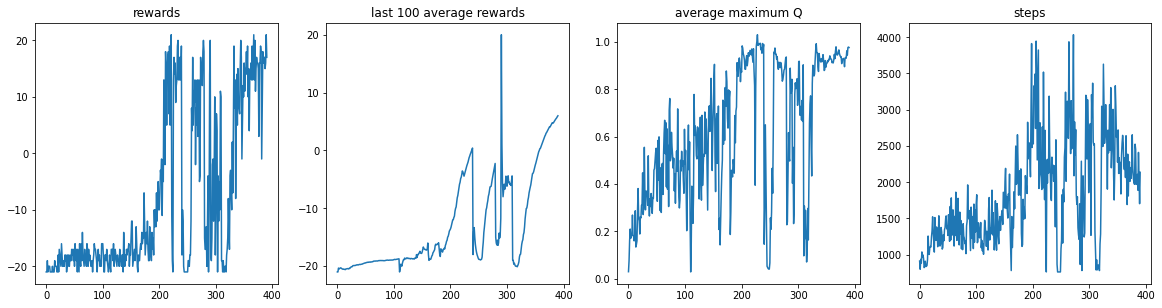

In [ ]:


file = open('/content/drive/MyDrive/DDQN/pong-cnn-out.txt', 'r')
s = file.read()
file.close()

ls = s.split('\n')
rewards = []
avg_rewards = []
avg_max_Qs = []
steps = []
del ls[len(ls) - 1]
for x in ls:
    parts = x.split(' ')
    reward_str = parts[2]
    reward_str = reward_str.replace('Reward:', '')
    reward = float(reward_str)
    rewards.append(reward)

    
    avg_reward_str = parts[4]
    avg_reward_str = avg_reward_str.replace('Last_100_Avg_Rew:', '')
    avg_reward = float(avg_reward_str)
    avg_rewards.append(avg_reward)

    avg_max_Q_str = parts[5]
    avg_max_Q_str = avg_max_Q_str.replace('Avg_Max_Q:', '')
    avg_max_Q = float(avg_max_Q_str)
    avg_max_Qs.append(avg_max_Q)

    step_str = parts[8]
    step_str = step_str.replace('Step:', '')
    step = int(step_str)
    steps.append(step)

fig = plt.figure(figsize = (20, 4.8))

fig.add_subplot(1, 4, 1)
plt.plot(rewards)
plt.title('rewards')

fig.add_subplot(1, 4, 2)
plt.plot(avg_rewards)
plt.title('last 100 average rewards')

fig.add_subplot(1, 4, 3)
plt.plot(avg_max_Qs)
plt.title('average maximum Q')

fig.add_subplot(1, 4, 4)
plt.plot(steps)
plt.title('steps')
plt.show()
    
